# Polynomial Interpolation

# Exercicio 1) a-

$$ f(x) = \sqrt{x}$$
$$ x_{0} = 1; x_{1} = 1.1; x_{2} = 1.15$$
$$ f(x_{0}) = 1; f(x_{1}) = 1.049; x_{2} = 1.072$$

O polinomio e dado pela seguinte expressao:

$$p_{2}(x) = f(x_{0}) + f[x_{0}, x_{1}](x-x_{0}) + f[x_{0}, x_{1}, x_{2}](x-x_{0})(x-x_{1}) $$

Vamos entao encontrar os operadores de diferenca dividida:

$$f(x_{0}) = 1$$
$$f[x_{0},x_{1}] = (1,049-1)/(1,1-1) = 0,49 $$
$$f[x_{1},x_{2}] = (1,072-1,049)/(1,15-1,1) = 0,46 $$
$$f[x_{0},x_{1}, x_{2}] = (0,46-0,49)/(1,15-1) = -0,2 $$

Entao:

$$p_{2}(x) = 1 + 0,49(x-1) + (-0,2)(x-1)(x-1,1) $$

Usando $x = 1,12$:

$$p_{2}(1,12) = 1 + 0,49(1,12-1) + (-0,2)(1,12-1)(1,12-1,1) = 1,05832$$

# b -

Utilizando o teorema 4


3 pontos $\Rightarrow n = 2$

$$ |E_{2}(x)| \leq |(x-x_{0})(x-x_{1})(x-x_{2})| max(t) \frac{\sqrt{|t|}}{3!} $$
$$ |E_{2}(x)| \leq |(x-x_{0})(x-x_{1})(x-x_{2})| max(t) \frac{\sqrt{x_{2}}}{6} $$

$(x-x_{0})(x-x_{1})(x-x_{2})$ atinge o valor maximo ($0,000264076$) quando $x = 1,03924$, logo:

$$E_{2}(x) \leq 0,000264076 \frac{\sqrt{1,15}}{6}$$

que implica em $E_{2}(x) \leq 0,000004719 $ para todo $ x \in [1,1.15]$


# Exercicio 2

# Exercicio 3

Provar que $f^{(k)} = (k+3x)3^{k-1}e^{3x}$ por inducao

base k=1

$$f' = (1+3x)3^0e^{3x} = e^{3x}(3x+1)$$

caso base correto!

Suposicao:

$f^{(k-1)} = (k-1+3x)3^{k-2}e^{3x}$

derivando dos dois lados temos:

$f^{(k)} = (k+3x)3^{k-1}e^{3x}$

Terminando a prova por inducao

Substituindo esse resultado e $h$ por $(x_{n}-x_{0})/n$ na formula do erro temos:

$$|E_{n} (x)| \leq \frac{(0,4/n)^{n+1}(n+2,2)3^n e^{1,2}}{4n+4} \leq 10^{-7}$$

Isolando o $n$ temos: $n \approx 7,29 \Rightarrow n = 8$ e como temos $n+1$ pontos sao necessarios $9$ pontos para ter um erro inferior a $10^{-7}$

# Exercicio 4

[ 0.9  1.3  1.9  2.1  2.6  3.   3.9  4.4  4.7  5.   6.   7.   8.   9.2
 10.5 11.3 11.6 12.  12.6 13.  13.3]
[1.3  1.5  1.85 2.1  2.6  2.7  2.4  2.15 1.95 2.1  2.25 2.3  2.25 1.95
 1.4  0.9  0.7  0.6  0.5  0.4  0.25]


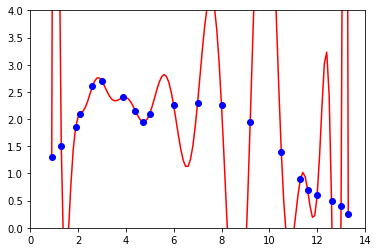

In [41]:
import matplotlib.pyplot as plt
import numpy as np


# Definindo a lista de pontos a serem interpolados
X = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
Y = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 1.95, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

print (np.around(X,4))
print (np.around(Y,4))


# Criando uma lista de listas para a tabela de diferencas divididas 
dd=[Y] #ordem 0

# Gerando a tabela de dif. div. a partir da ordem 1 em diante
for o in range(1, len(X)):
    dd.append([])   # Adiciona uma lista vazia para armazenar as dds de ordem 1
    for k in range(0, len(X)-o, 1): 
        valor = (dd[o-1][k+1]-dd[o-1][k])/(X[k+o]-X[k])    
        dd[o].append(valor)


def produtorio(x,n):
    prod = 1.
    for i in range(n):
        prod = prod * (x-X[i])
    return prod


def calculaP(x):
    soma = dd[0][0]
    for i in range(1,len(X)):
        soma = soma + produtorio(x,i)*dd[i][0]
    return soma

Z = []
Z = np.arange(0.9,13.4,0.1)
Yp = []
for z in Z:
    y = calculaP(z)
    Yp.append(y)

# A linha vermelha representa a aproximacao e as bolinhas sao os pontos originais definidos inicialmente

plt.plot(Z, Yp, '-r', X, Y, 'bo',)
plt.ylim(0, 4)
plt.xlim(0, 14)
plt.show()